## Task 4 - Clustering

This task focuses on dimensionality reduction of the dataset with PCA. The PCA reduced data is then visualised using clustering, with added validation done using elbow method and scree plot to find the ideal number of clusters and PCA components respectively.

In [1]:
import matplotlib.pyplot as plt 
from ipynb.fs.full.functions import (
    load_model, load_dataset, plot_feature_split_of_values, plot_class_split_of_values, reduce_pca_dimensionality,
    plot_elbow_method, plot_silhouette_score, plot_scree_plot, plot_clustering, plot_clustering_centroids
)
from sklearn.cluster import KMeans

----
## Fetching Dataset

(16200, 512)
(5400, 512)
(16200,)
(5400,)


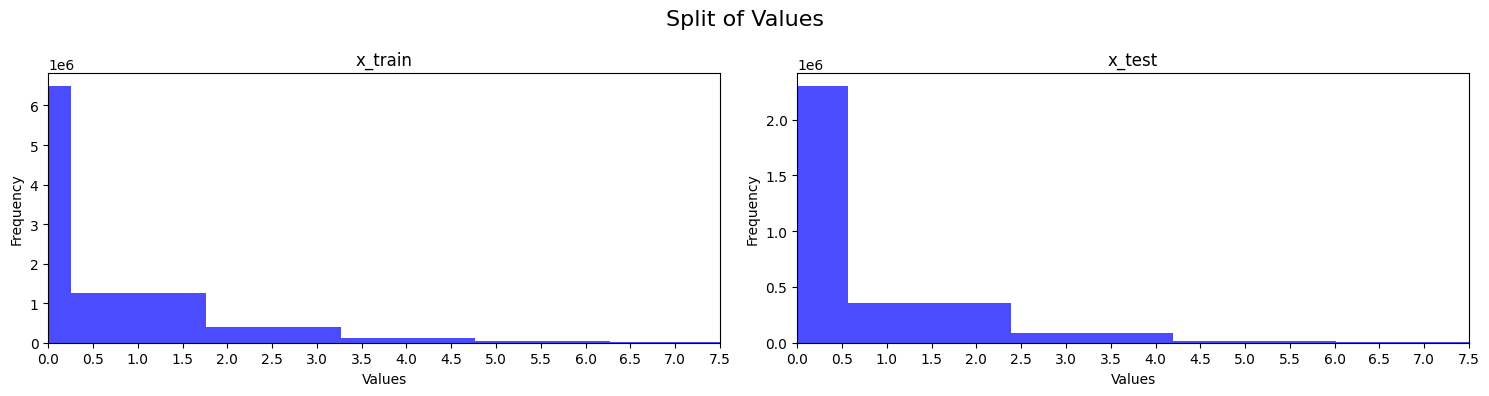

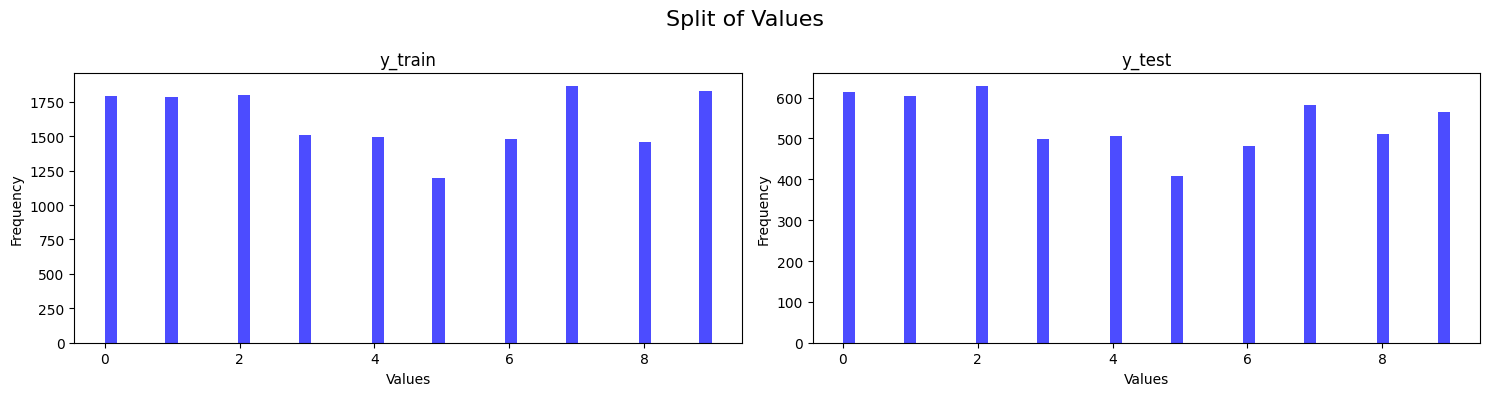

In [2]:
x_train_norm = load_dataset("./datasets/saved_datasets/task1/x_train")
x_test_norm = load_dataset("./datasets/saved_datasets/task1/x_test")
y_train_norm = load_dataset("./datasets/saved_datasets/task1/y_train")
y_test_norm = load_dataset("./datasets/saved_datasets/task1/y_test")

print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

plot_feature_split_of_values([x_train_norm, x_test_norm], ["x_train", "x_test"], 7.5)
plot_class_split_of_values([y_train_norm, y_test_norm], ["y_train", "y_test"])

----
## Dimensionality Reduction 

PCA was implemented to reduce the dimensionality of the data to 2. After dimensionality reduction, the shapes of both train and test feature sets are as follows:

- `x_train - (16200, 2)`

- `x_test - (5400, 2)`

In [3]:
x_train_pca, x_test_pca = reduce_pca_dimensionality(x_train_norm, x_test_norm, 2)
print(x_train_pca.shape)
print(x_test_pca.shape)

(16200, 2)
(5400, 2)


----
## Clustering

After dimensionality reduction was completed, clustering was implented to identify natural groupings and patterins within the data.

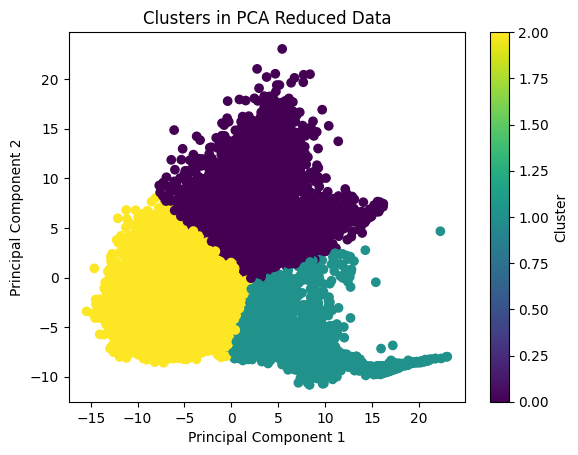

In [4]:
km = KMeans(n_clusters=3, random_state=42)
clusters = km.fit_predict(x_train_pca)
plot_clustering(x_train_pca, clusters)

#### Finding the best K value
- Elbow method - 3

- Silhoutte coefficiant - 3

It can be seen that the best number of clusters (K) is 3.

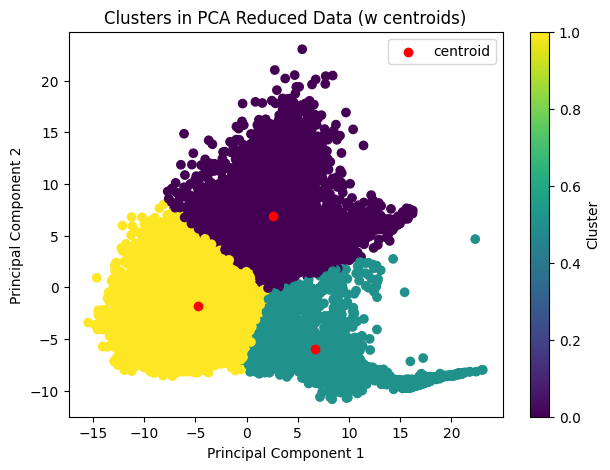

In [5]:
# Finding the centroids of each cluster to calculate the SSE
plot_clustering_centroids(x_train_pca, clusters, km)

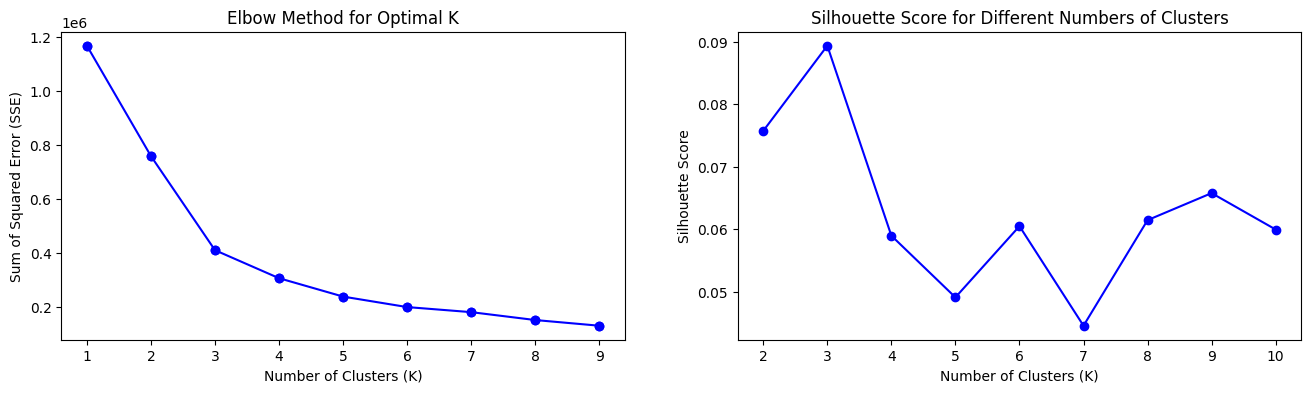

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_elbow_method(x_train_pca, axes[0])
plot_silhouette_score(x_train_norm, axes[1])

It can be seen that at `K=3` was the ideal number of clusters, as this is the point where the "elbow" is formed in the Elbow Method and the SSE starts sharply levelling out. Also, with the Silhouette score, it can be seen that the highest performance is with 3 clusters.

#### Finding the ideal # of PCs

Next, it needed to be seen what the ideal number of PCs were that captures majority of the variance (>80%) and to do that, a `Scree Plot` had to be created. It could be seen that <b>3 principal components</b> was the ideal amount as it covered 85% of the variance.

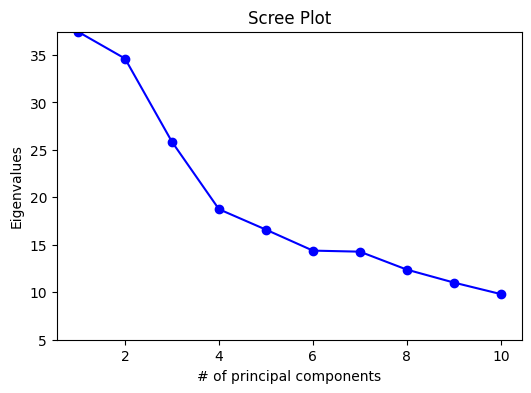

In [8]:
plot_scree_plot(x_train_norm)

----
<b>Markdown Question: How do you think the visualization will change if you used 3 PCA components?</b>

<b>Answer:</b> When 3 PCA components are used, the visualization will change to a 3D scatter plot, as there will be 3 principal components used for plotting. A 3D visualization can be useful as it could allow for more variance in the dataset, better represent the original dataset, and allow for better insights. Whilst a 3D visualisation may provide more insight with the newly added axis, it could create additional complexity with interpreting data and identifying the clusters.